In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 파일 불러오기 (local에서 업로드)
from google.colab import files
files.upload()

{}

In [2]:
df_clean = pd.read_csv('df_clean.csv')

In [3]:
df_clean.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


In [4]:
df_clean = df_clean.drop(columns = 'Unnamed: 0')
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


In [5]:
from pandas.compat.numpy.function import ALLANY_DEFAULTS
# 전체 게임시장의 트렌드, 미래 성장 가능성 분석을 위해 연도별 성장률을 기반으로 선형회귀 분석을 진행한다.

anually_sales = df_clean.groupby('Year').sum()
anually_sales['growth'] = anually_sales.Total_Sales.pct_change()
anually_sales = anually_sales.reset_index()
anually_sales.head()


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,growth
0,1981.0,33400000.0,1960000.0,0.0,320000.0,35680000.0,NaN
1,1982.0,26920000.0,1650000.0,0.0,310000.0,28880000.0,-0.190583
2,1983.0,7760000.0,800000.0,8100000.0,140000.0,16800000.0,-0.418283
3,1984.0,33280000.0,2100000.0,14270000.0,700000.0,50350000.0,1.997024
4,1985.0,33730000.0,4740000.0,14560000.0,920000.0,53950000.0,0.071500


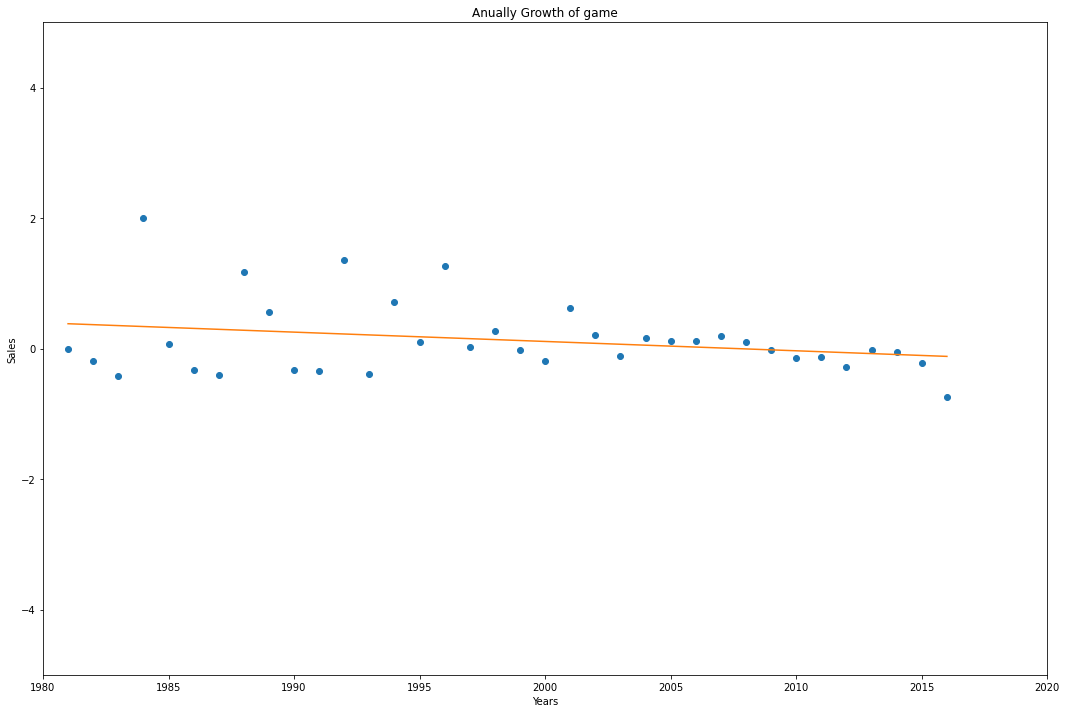

In [6]:
anually_rate = anually_sales.fillna(0)

X_a = anually_rate.Year
y_a = anually_rate.growth

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_a.values.reshape(-1,1), y_a)

plt.figure(figsize = (18,12))
plt.scatter(anually_rate.Year, anually_rate.Total_Sales) 
plt.title("Anually Growth of game")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.axis([1980, 2020, -5, 5])

plt.plot(X_a, y_a, 'o')
plt.plot(X_a,lr.predict(X_a.values.reshape(-1,1)))

plt.show() 


> 게임 시장은 게임전용기기를 이용하는 Console 게임과 개인용 컴퓨터인 PC에서 할 수 있는 PC게임으로 나누어 진다. Console 게임은 전용기기를 이용하기 때문에 다양한 그래픽과 액션을 구현할 수 있어서 전통적으로 게임시장을 이끄는 대표 플랫폼 이었지만, 최근 PC와 그래픽카드의 급격한 성능향상에 의해서 Console 못지 않은 게임들이 출시되면서 PC게임 유저가 늘어나고 있다.
> 이에 따라서 최근 게임시장의 트렌드를 Console 과 PC 시장으로 비교하여 최근 트렌드와 미래 성장가능성을 검토해 보고, 게임게발의 방향을 제안 하려고 한다.

In [7]:
# 플랫폼별 비교를 위해 PC 게임을 분류
df_pc = df_clean[(df_clean.Platform == 'PC')]
df_pc.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,20000.0,10000.0,0.0,0.0,30000.0
12,Mount & Blade,PC,2008.0,Role-Playing,Paradox Interactive,0.0,20000.0,0.0,0.0,20000.0
16,Rise of Nations,PC,2003.0,Strategy,Microsoft Game Studios,10000.0,20000.0,0.0,10000.0,40000.0
19,Tropico Reloaded,PC,2009.0,Strategy,Kalypso Media,0.0,20000.0,0.0,0.0,20000.0
27,World of Tanks,PC,2011.0,Shooter,Wargaming.net,0.0,230000.0,0.0,60000.0,290000.0


In [8]:
# 연도별 PC게임 판매량 분석

df_pc_sales = df_pc.groupby('Year').sum()
df_pc_sales = df_pc_sales.reset_index()
df_pc_sales.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1985.0,0.0,30000.0,0.0,10000.0,40000.0
1,1988.0,0.0,20000.0,0.0,10000.0,30000.0
2,1992.0,1240000.0,1660000.0,0.0,110000.0,3010000.0
3,1994.0,5550000.0,6850000.0,0.0,460000.0,12860000.0
4,1995.0,1710000.0,2270000.0,0.0,230000.0,4210000.0


In [9]:
# PC게임의 최근 10년간 판매량 정리
df_pc_rate = df_pc_sales[['Year', 'Total_Sales']]
df_pc_rate = df_pc_sales[(df_pc_sales.Year > 2006)]
df_pc_rate.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
16,2007.0,2760000.0,6200000.0,0.0,370000.0,9330000.0
17,2008.0,560000.0,9010000.0,0.0,2040000.0,11610000.0
18,2009.0,1310000.0,13360000.0,0.0,2250000.0,16920000.0
19,2010.0,9120000.0,11800000.0,0.0,3170000.0,24090000.0
20,2011.0,10610000.0,18760000.0,0.0,5630000.0,35000000.0


In [10]:
# PC 게임의 연도별 성장률 계산
df_pc_rate['growth'] = df_pc_rate.Total_Sales.pct_change()

df_pc_rate.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,growth
16,2007.0,2760000.0,6200000.0,0.0,370000.0,9330000.0,NaN
17,2008.0,560000.0,9010000.0,0.0,2040000.0,11610000.0,0.244373
18,2009.0,1310000.0,13360000.0,0.0,2250000.0,16920000.0,0.457364
19,2010.0,9120000.0,11800000.0,0.0,3170000.0,24090000.0,0.423759
20,2011.0,10610000.0,18760000.0,0.0,5630000.0,35000000.0,0.452885


In [11]:
# 선형회귀를 통해 PC게임의 최근 추세 분석
df_pc_rate = df_pc_rate.fillna(0)

X_p = df_pc_rate.Year
y_p = df_pc_rate.growth
y_p

16    0.000000
17    0.244373
18    0.457364
19    0.423759
20    0.452885
21   -0.328571
22   -0.455319
23    0.041406
24   -0.397599
25   -0.676214
Name: growth, dtype: float64

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_p.values.reshape(-1,1), y_p)

LinearRegression()

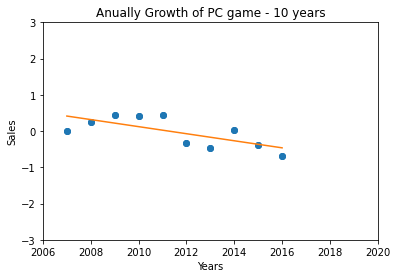

In [13]:
# PC 게임의 최근 10년간 성장률, 추세선 분석
plt.scatter(df_pc_rate.Year, df_pc_rate.growth) 
plt.title("Anually Growth of PC game - 10 years")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.axis([2006, 2020, -3, 3])

plt.plot(X_p, y_p, 'o')
plt.plot(X_p,lr.predict(X_p.values.reshape(-1,1)))

plt.show() 

In [14]:
# 플랫폼별 비교를 위해 Console 게임을 분류
df_con = df_clean[(df_clean.Platform != 'PC')]
df_con.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0


In [15]:
# Console 게임의 성장률 분석을 위한 데이터 정리
df_con_sales = df_con.groupby('Year').sum()
df_con_sales = df_con_sales.reset_index()
df_con_sales.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1981.0,33400000.0,1960000.0,0.0,320000.0,35680000.0
1,1982.0,26920000.0,1650000.0,0.0,310000.0,28880000.0
2,1983.0,7760000.0,800000.0,8100000.0,140000.0,16800000.0
3,1984.0,33280000.0,2100000.0,14270000.0,700000.0,50350000.0
4,1985.0,33730000.0,4710000.0,14560000.0,910000.0,53910000.0


In [16]:
# Console 게임의 최근 10년간 판매량 정리
df_con_rate = df_con_sales[['Year', 'Total_Sales']]
df_con_rate = df_con_sales[(df_con_sales.Year > 2006)]
df_con_rate.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
26,2007.0,307490000.0,153910000.0,60290000.0,77130000.0,598820000.0
27,2008.0,349020000.0,173960000.0,60230000.0,79420000.0,662630000.0
28,2009.0,336690000.0,177570000.0,61200000.0,72320000.0,647780000.0
29,2010.0,286520000.0,157380000.0,50400000.0,54850000.0,549150000.0
30,2011.0,223180000.0,144860000.0,52670000.0,47620000.0,468330000.0


In [17]:
# Console 게임의 연도별 성장률 계산
df_con_rate['growth'] = df_con_rate.Total_Sales.pct_change()

df_con_rate.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,growth
26,2007.0,307490000.0,153910000.0,60290000.0,77130000.0,598820000.0,NaN
27,2008.0,349020000.0,173960000.0,60230000.0,79420000.0,662630000.0,0.106560
28,2009.0,336690000.0,177570000.0,61200000.0,72320000.0,647780000.0,-0.022411
29,2010.0,286520000.0,157380000.0,50400000.0,54850000.0,549150000.0,-0.152258
30,2011.0,223180000.0,144860000.0,52670000.0,47620000.0,468330000.0,-0.147173


In [18]:
# 선형회귀를 통해 Console 게임의 최근 추세 분석

df_con_rate = df_con_rate.fillna(0)

X_c = df_con_rate.Year
y_c = df_con_rate.growth
y_c

26    0.000000
27    0.106560
28   -0.022411
29   -0.152258
30   -0.147173
31   -0.278714
32    0.008348
33   -0.057630
34   -0.210100
35   -0.748570
Name: growth, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_c.values.reshape(-1,1), y_c)

LinearRegression()

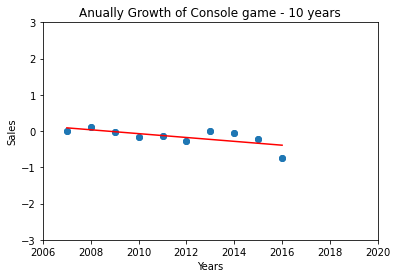

In [20]:
plt.scatter(df_con_rate.Year, df_con_rate.growth) 
plt.title("Anually Growth of Console game - 10 years")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.axis([2006, 2020, -3, 3])

plt.plot(X_c, y_c, 'o')
plt.plot(X_c,lr.predict(X_c.values.reshape(-1,1)), color='red')

plt.show() 

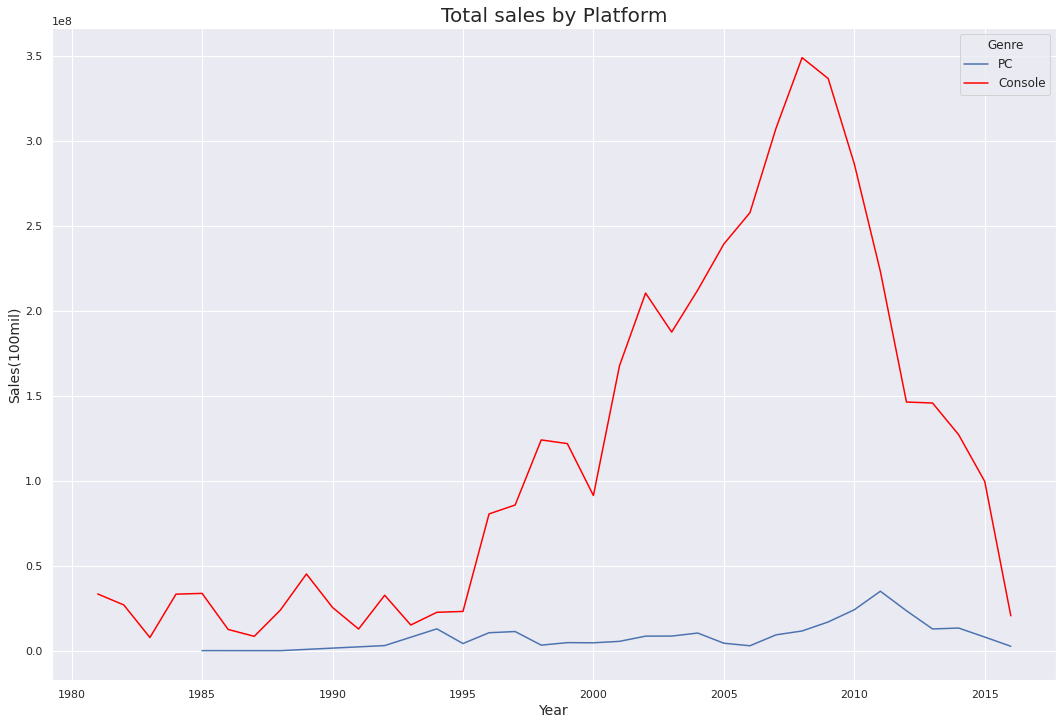

In [21]:
import seaborn as sns

sns.set()
sns.set_style(style=None, rc=None)
plt.figure(figsize = (18,12))

ax = sns.lineplot(x='Year', y='Total_Sales', data=df_pc_sales, label = 'PC', ci=None)
ax = sns.lineplot(x='Year', y='NA_Sales', data=df_con_sales, color='Red', label='Console', ci=None)


plt.title('Total sales by Platform', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales(100mil)', fontsize=14)
plt.legend(('PC', 'Console'), fontsize=12, title='Genre', loc='best')

plt.show()

> 전체 게임시장은 콘솔게임이 주도해왔지만, 2000년대 후반 최정점을 찍고 2010년대에 들어오면서 콘솔게임 시장은 급격하게 줄어들고 있다. <br>
반면, PC게임은 큰폭의 변동없이 유지하고 있다. 이 두 시장의 성장성을 검증하고 향후 개발방향을 잡을 필요가 있다.
앞서 두 플랫폼의 10년간 비교 분석에서는 큰 차이가 없는 것으로 나왔지만, 전체 판매량의 변화를 통해서는 Colsole 게임판매가 급격히 감소하는 것을 확인 할 수 있다. 따라서 10년이 아닌 최근 5년간의 분석을 통해서 좀더 최신 트렌드를 보고자 한다.


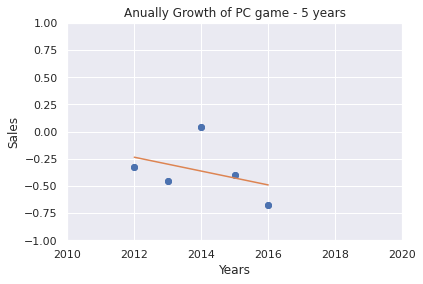

In [22]:
# PC게임의 최근 5년간 성장률에 따른 선형회귀 분석

df_pc_5 = df_pc_rate[(df_pc_rate.Year > 2011)].fillna(0)

X_p_5 = df_pc_5.Year
y_p_5 = df_pc_5.growth

lr = LinearRegression()
lr.fit(X_p_5.values.reshape(-1,1), y_p_5)

plt.scatter(df_pc_5.Year, df_pc_5.growth) 
plt.title("Anually Growth of PC game - 5 years")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.axis([2010, 2020, -1, 1])

plt.plot(X_p_5, y_p_5, 'o')
plt.plot(X_p_5,lr.predict(X_p_5.values.reshape(-1,1)))

plt.show() 

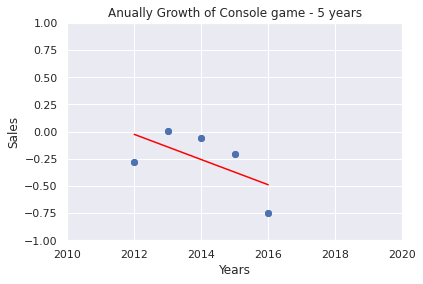

In [23]:
# Console 게임의 최근 5년간 성장률에 따른 선형회귀 분석

df_con_5 = df_con_rate[(df_con_rate.Year > 2011)].fillna(0)

X_c_5 = df_con_5.Year
y_c_5 = df_con_5.growth

lr = LinearRegression()
lr.fit(X_c_5.values.reshape(-1,1), y_c_5)

plt.scatter(df_con_5.Year, df_con_5.growth) 
plt.title("Anually Growth of Console game - 5 years")
plt.xlabel("Years")
plt.ylabel("Sales")
plt.axis([2010, 2020, -1, 1])

plt.plot(X_c_5, y_c_5, 'o')
plt.plot(X_c_5,lr.predict(X_c_5.values.reshape(-1,1)), color='red')

plt.show() 

> 최근 5년간 자료를 분석하면 PC게임보다 Console 게임의 성장률 감소세가 크게 나타난다. Console 게임 시장규모는 크지만 미래 성장 가능성은 PC 시장보다 좋지 않다고 보여진다. 따라서 성장 가능성이 떨어지는 Console 게임 보다 PC 게임 개발을 진행하는 것이 좀더 합리적인 판단으로 보여진다.

>## 그렇다면 어떤 장르의 게임을 어느지역을 대상으로 출시할 것인가?
최근 5년간 PC 게임 판매량을 장르와 판매지역으로 분석하고, 이 정보를 기반으로 게임개발 방향을 제안 하도록 하겠다.

In [24]:
# 최근 5년간 Console 게임 TOP 20 분석

df_con_20 = df_con[(df_con['Year'] > 2011)].sort_values('Total_Sales', ascending=False)
df_con_20 = df_con_20.groupby(['Name', 'Genre']).sum().sort_values('Total_Sales', ascending=False)
df_con_20 = df_con_20.reset_index().head(20)
df_con_20

,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,Action,8054.0,23100000.0,22400000.0,1390000.0,7950000.0,54840000.0
1,Call of Duty: Black Ops II,Shooter,6036.0,13450000.0,10360000.0,720000.0,3670000.0,28200000.0
2,Call of Duty: Ghosts,Shooter,10065.0,14690000.0,8640000.0,480000.0,2830000.0,26640000.0
3,Call of Duty: Black Ops 3,Shooter,8060.0,11890000.0,9340000.0,430000.0,3410000.0,25070000.0
4,Minecraft,Misc,12085.0,10820000.0,8850000.0,1150000.0,2930000.0,23750000.0
5,Call of Duty: Advanced Warfare,Shooter,8056.0,10300000.0,7950000.0,340000.0,2890000.0,21480000.0
6,FIFA 15,Sports,14098.0,3200000.0,12130000.0,130000.0,3260000.0,18720000.0
7,FIFA 14,Sports,16104.0,2830000.0,10780000.0,200000.0,2920000.0,16730000.0
8,FIFA 16,Sports,8060.0,2940000.0,11160000.0,110000.0,2040000.0,16250000.0
9,FIFA Soccer 13,Action,14084.0,2620000.0,9940000.0,230000.0,2960000.0,15750000.0


In [25]:
# Console TOP 20의 지역별 판매 비율 확인
# df_con_20['NA_p'] = df_con_20.NA_Sales.div(df_con_10['Total_Sales'])
# df_con_20['EU_p'] = df_con_20.EU_Sales.div(df_con_10['Total_Sales'])
# df_con_20['JP_p'] = df_con_20.JP_Sales.div(df_con_10['Total_Sales'])
# df_con_20['Other_p'] = df_con_20.Other_Sales.div(df_con_10['Total_Sales'])


In [26]:
# 최근 5년간 PC 게임 TOP 20 분석

df_pc_20 = df_pc[(df_pc['Year'] > 2011)].sort_values('Total_Sales', ascending=False)
df_pc_20 = df_pc_20.groupby(['Name', 'Genre']).sum().sort_values('Total_Sales', ascending=False)
df_pc_20 = df_pc_20.reset_index().head(20)
df_pc_20

,Name,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Diablo III,Role-Playing,2012.0,2430000.0,2150000.0,0.0,620000.0,5200000.0
1,The Sims 4,Simulation,2014.0,960000.0,1720000.0,0.0,290000.0,2970000.0
2,Guild Wars 2,Action,2012.0,950000.0,1060000.0,0.0,290000.0,2300000.0
3,World of Warcraft: Mists of Pandaria,Role-Playing,2012.0,840000.0,760000.0,0.0,230000.0,1830000.0
4,StarCraft II: Heart of the Swarm,Strategy,2013.0,820000.0,650000.0,0.0,190000.0,1660000.0
5,Call of Duty: Black Ops II,Shooter,2012.0,630000.0,690000.0,0.0,210000.0,1530000.0
6,SimCity (2013),Simulation,2013.0,480000.0,770000.0,0.0,190000.0,1440000.0
7,Battlefield 4,Shooter,2013.0,380000.0,860000.0,0.0,160000.0,1400000.0
8,Farming Simulator 2015,Simulation,2014.0,80000.0,1020000.0,0.0,130000.0,1230000.0
9,Fallout 4,Role-Playing,2015.0,500000.0,630000.0,0.0,100000.0,1230000.0


In [27]:
pc_game = df_pc[(df_pc['Year'] > 2011)].sort_values('Total_Sales', ascending=False)
pc_game = pc_game.groupby(['Genre']).sum().sort_values('Total_Sales', ascending=False)
pc_game = pc_game.reset_index().drop(columns='Year')
pc_game

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Shooter,4590000.0,7460000.0,0.0,1550000.0,13600000.0
1,Role-Playing,5610000.0,6470000.0,0.0,1510000.0,13590000.0
2,Action,4040000.0,7300000.0,0.0,1480000.0,12820000.0
3,Simulation,1590000.0,5740000.0,0.0,930000.0,8260000.0
4,Strategy,1830000.0,3270000.0,0.0,610000.0,5710000.0
5,Sports,120000.0,2660000.0,0.0,450000.0,3230000.0
6,Racing,50000.0,1030000.0,0.0,130000.0,1210000.0
7,Adventure,30000.0,720000.0,0.0,90000.0,840000.0
8,Misc,350000.0,300000.0,0.0,70000.0,720000.0
9,Platform,10000.0,100000.0,0.0,20000.0,130000.0


In [28]:
pc_heat = pc_game.set_index('Genre')
pc_heat = pc_heat / 1000000

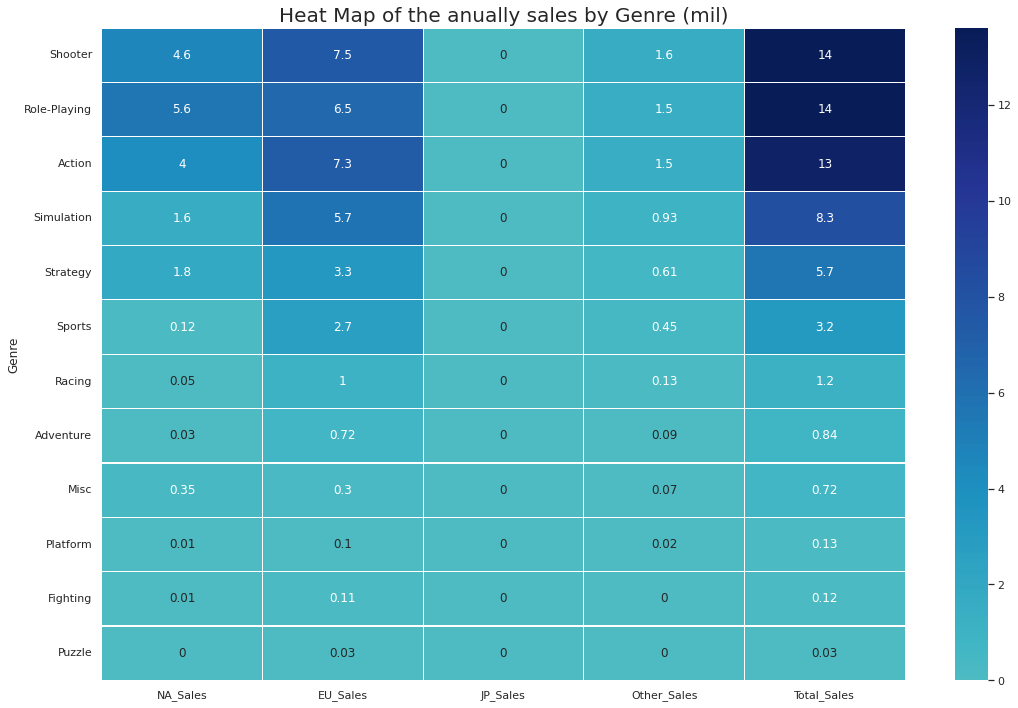

In [29]:
plt.figure(figsize = (18,12))
plt.title('Heat Map of the anually sales by Genre (mil)', fontsize=20)
ax= sns.heatmap(pc_heat, center=0.7, linewidths=0.2, cmap='YlGnBu', annot=True)

> ## 결론
PC 게임중 상위 판매량 장르인 슈팅, 롤플레잉, 액션 게임등을 미국, 유럽을 대상으로 출시하는 것을 제안한다.